In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nproc

2


In [ ]:
# Para crear procesos
import os

# Para trabajar con arrelgos numpy, una herramienta potente para todo lo que es 
# calculo numerico
import numpy as np 

#Para graficar
import matplotlib.pyplot as plt

# Para trabajar con datasets, se usa mucho para analisis de datos
import pandas as pd

In [ ]:
def plot(threads, time, std, filtro):

    fig, ax = plt.subplots()
    ax.plot(threads, time, 'b-', color='green')
    if np.any(std) != 0:
        ax.fill_between(threads, time-std, time+std, color='red')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance ' + filtro + ' multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [ ]:
! unzip "/content/drive/My Drive/TP2-IMAGINE.zip"


Archive:  /content/drive/My Drive/TP2-IMAGINE.zip
replace TP2-IMAGINE/test/resultados.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TP2-IMAGINE/test/resultados.csv  
  inflating: TP2-IMAGINE/streamlit/requirements.txt  
  inflating: TP2-IMAGINE/streamlit/app.py  
  inflating: TP2-IMAGINE/src/main    
  inflating: TP2-IMAGINE/src/ppm.o   
  inflating: TP2-IMAGINE/src/filters.o  
  inflating: TP2-IMAGINE/src/main.o  
  inflating: TP2-IMAGINE/src/algo    
  inflating: TP2-IMAGINE/src/ppm.h   
  inflating: TP2-IMAGINE/src/ppm.cpp  
  inflating: TP2-IMAGINE/src/Makefile  
  inflating: TP2-IMAGINE/src/main.cpp  
  inflating: TP2-IMAGINE/src/imgs/totoro2.ppm  
  inflating: TP2-IMAGINE/src/imgs/totoro.ppm  
  inflating: TP2-IMAGINE/src/imgs/sign_2.ppm  
  inflating: TP2-IMAGINE/src/imgs/nausicaa2.ppm  
  inflating: TP2-IMAGINE/src/imgs/nausicaa.ppm  
  inflating: TP2-IMAGINE/src/imgs/motor.ppm  
  inflating: TP2-IMAGINE/src/imgs/mononoke.ppm  
  inflating: TP2-IMAGINE/src/imgs/koen

In [ ]:
! cd TP2-IMAGINE/src/;g++ -pthread -Ofast -o algo main.cpp ppm.cpp filters.cpp # hacer el nuestro

In [ ]:
! rm TP2-IMAGINE/test/resultados.csv
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main brightness " + str(threads) +  " 0.14 2 imgs/totoro.ppm out/salida.ppm "  
  os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,989,0.044420,1
1,989,0.040907,2
2,989,0.043238,3
3,989,0.041067,4
4,989,0.052015,5
5,989,0.041163,6
6,989,0.042167,7
7,989,0.041484,8
8,989,0.043178,9
9,989,0.042328,10


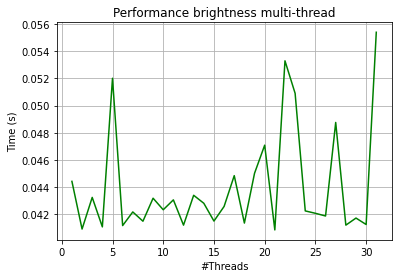

In [ ]:
threads = dataframe['Threads']
time = dataframe['Time']
plot(threads, time, 0, 'brightness')

In [ ]:
! rm TP2-IMAGINE/test/resultados.csv
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main brightness " + str(threads) +  " 0.14 2 imgs/totoro.ppm out/salida.ppm"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.047934
2     0.041497
3     0.042820
4     0.042401
5     0.042521
6     0.041286
7     0.042110
8     0.042794
9     0.041535
10    0.042487
11    0.042664
12    0.041505
13    0.042458
14    0.042724
15    0.042050
16    0.041862
17    0.042394
18    0.042673
19    0.041841
20    0.062612
21    0.045154
22    0.043395
23    0.042201
24    0.041488
25    0.042577
26    0.042106
27    0.042634
28    0.043104
29    0.042662
30    0.041498
31    0.041173
Name: Time, dtype: float64

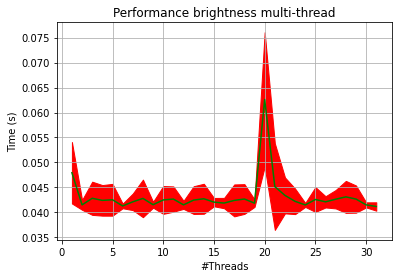

Max Gain: 34.24099406658521 %


In [ ]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'brightness' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Max Gain:" , gain ,"%")


BRIGHTNESS

¿Qué se puede decir sobre la performance del filtro en función de la cantidad de threads utilizados?
 Se puede ver en los graficos como al principio mayores threads significan menores tiempos, pero cuanto mas threads agregas, peor es el tiempo.





In [ ]:
! rm TP2-IMAGINE/test/resultados.csv
for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main brightness " + str(threads) +  " 0.5  2 imgs/sign.ppm out/salida.ppm"  
  os.system(cmd)
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,0,0.000002,1
1,0,0.008311,2
2,0,0.006016,3
3,0,0.005879,4
4,0,0.010948,5
5,0,0.016545,6
6,0,0.000620,7
7,0,0.000486,8
8,0,0.001984,9
9,0,0.008513,10


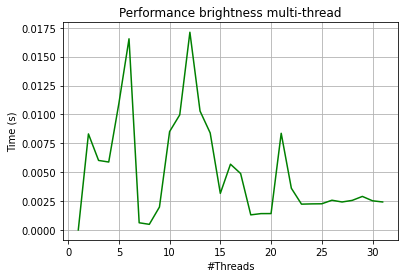

In [ ]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness')

In [ ]:
for threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(threads) +  " 0 imgs/sign.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.000002
2     0.008311
3     0.006016
4     0.005879
5     0.010948
6     0.016545
7     0.000620
8     0.000486
9     0.001984
10    0.008513
11    0.009963
12    0.017112
13    0.010289
14    0.008395
15    0.003165
16    0.005690
17    0.004883
18    0.001305
19    0.001413
20    0.001416
21    0.008365
22    0.003610
23    0.002232
24    0.002255
25    0.002264
26    0.002571
27    0.002420
28    0.002558
29    0.002901
30    0.002523
31    0.002421
Name: Time, dtype: float64

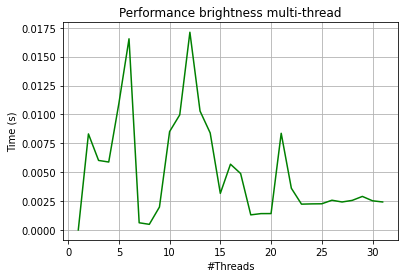

Ganancia maxima: 99.98831229546518 %


In [ ]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'brightness' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")

GRANDE VS. CHICO

¿Qué impacto tiene considerar imágenes "grandes" en lugar de imágenes "chicas"?

La principal diferencia es que con las imagenes chicas, al tratar de usar muchos threads para pocos pixeles, hace que un thread tenga pocos pixeles en comparacion con una imagen grande, donde cada uno va a tener varios pixeles. Por lo cual hace que a la larga en multithread no sirva tanto debido a que se tarda mas en crear los threads que en hacer sus procesos.

¿Cuán determinante es la configuración de hardware donde se corren los experimentos y como puede relacionarse con lo observado?

Es bastante importante el hardware ya que la paralelizacion de tareas sirve mas o menos para cada computadora y sus nucleos. En nuestro caso no parece que haya mucha nocion de problemas de hardware debido a que nuestras computadoras tienen bastantes nucleos.

In [ ]:
for threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main edgeDetection " + str(threads) +  "2 imgs/totoro.ppm out/salida.ppm"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.000002
2     0.008311
3     0.006016
4     0.005879
5     0.010948
6     0.016545
7     0.000620
8     0.000486
9     0.001984
10    0.008513
11    0.009963
12    0.017112
13    0.010289
14    0.008395
15    0.003165
16    0.005690
17    0.004883
18    0.001305
19    0.001413
20    0.001416
21    0.008365
22    0.003610
23    0.002232
24    0.002255
25    0.002264
26    0.002571
27    0.002420
28    0.002558
29    0.002901
30    0.002523
31    0.002421
Name: Time, dtype: float64

In [ ]:
threads = np.arange(1,32)

plot(threads,df_mean_time, df_std_time, 'edgeDetection' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")

In [ ]:

for threads in range(1,32):
  cmd = "cd TP2-IMAGINE/src/; "
  cmd += "./main edgeDetection " + str(threads) +  " 0.14 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('TP2-IMAGINE/test/resultados.csv', names=['Width', 'Time', 'Threads'])
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

In [ ]:
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'edgeDetection' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")

DIFERENTES MULTI-THREADS



SIEMPRE PARALELIZAR

¿siempre es conveniente paralelizar? ¿De qué factores de la entrada depende esto? Depende completamente de lo que se este pensando paralelizar, puede ser que si es muy chica no convenga, o si el filtro es muy complicado tampoco.